1. Загрузить исходные данные data.csv

Импортируем основные библиотеки и посмотрим на данные

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel('data_xl.xlsx') # файл был сохранен в эксель и открыт через read_excel
#raw_data = pd.read_csv('data.csv', sep=';')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


2. Провести первоначальный анализ предложенных данных

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [347]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


In [348]:
# посмотрим на список колонок
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [349]:
# проверим распределение 1 и 0 в целевой переменной SaleCategory
data.SaleCategory.value_counts(dropna=False, normalize=True)

0    0.702055
1    0.297945
Name: SaleCategory, dtype: float64

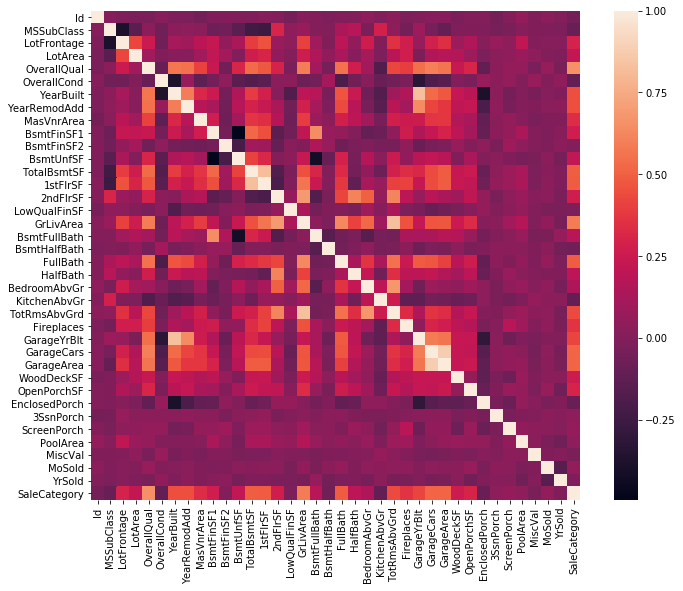

In [350]:
#нарисуем корр матрицу
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

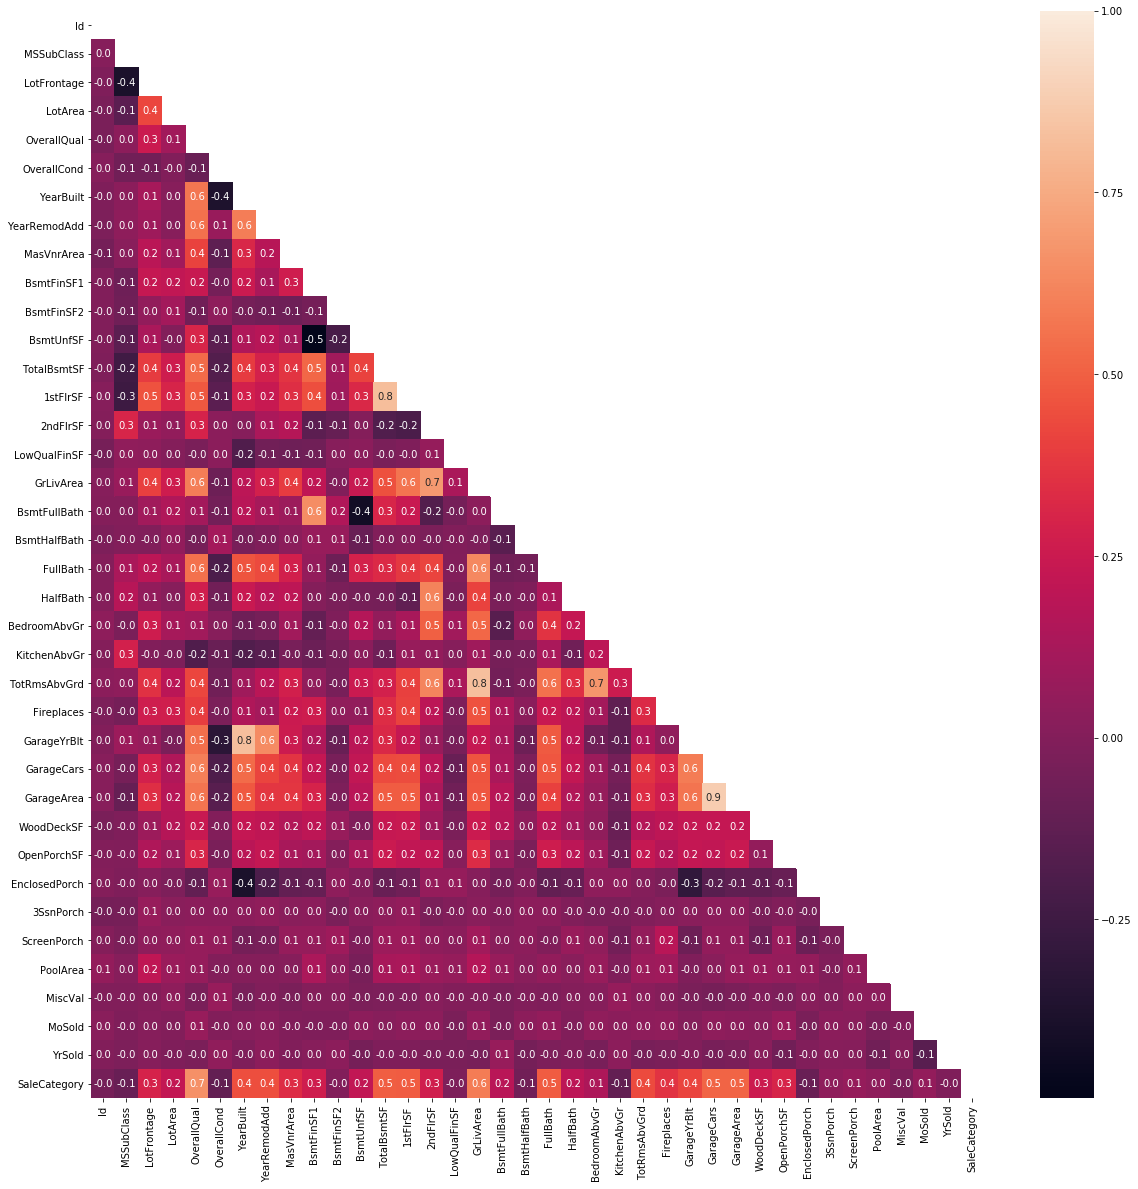

In [351]:
# более продвинутый вариант
corrmat = data.corr()

plt.figure(figsize=(20, 20))

mask = np.triu(np.ones((len(corrmat), len(corrmat))), k=0)

sns.heatmap(corrmat, annot = True, mask = mask,
            xticklabels=corrmat.columns.values,
            yticklabels=corrmat.columns.values,
           fmt = ".1f"
           )
plt.show()

In [ ]:
# еще более модный вариант

In [396]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 

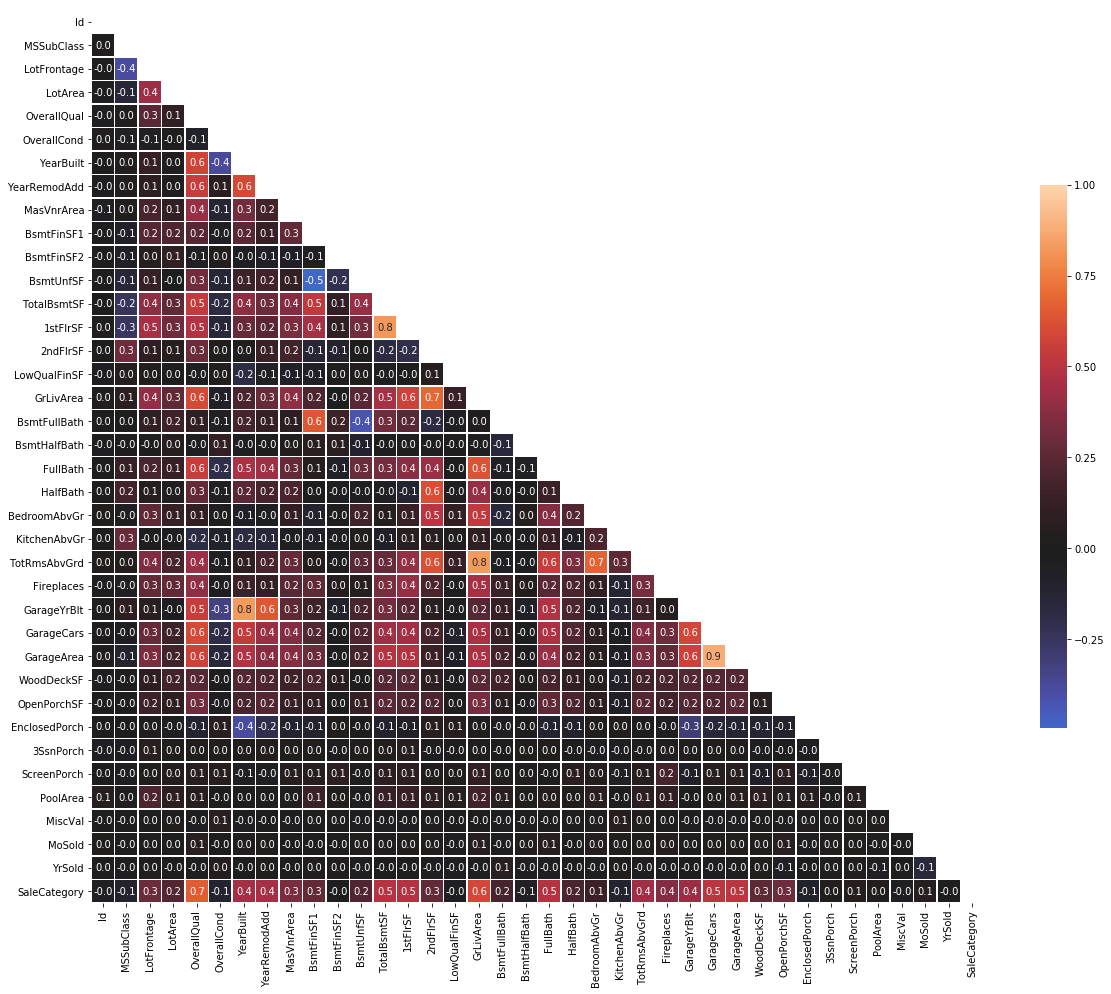

In [397]:
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corrmat, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [352]:
# запишем колонки в список
columns = list(data.columns)

3. Предложить стратегию по работе с пропущенными значениями в данных

In [353]:
# посмотрим, сколько у нас пропущенных значений в целом
df_train = data.copy()
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [354]:
# варианты могут быть разные:
#удалить
#если интервальная переменная - заполнить средним или медианой
#если категориальная - заполнить самым популярным (не есть хорошо)
                    #- заполнить новой категорией, например 'other'

In [355]:
# Стратегия по работе с пропущенными значениями - удалить топ-5
to_remove = missing_data.head(5).reset_index()['index'].tolist()
to_remove

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [356]:
columns = list(set(columns) - set(to_remove))

In [357]:
# было колонок
len(data.columns)

81

In [358]:
# удалили 5 колонок, осталось:
len(columns)

76

In [359]:
# оставляем в датафрейме только колонки с небольшим количеством пропущенных значений
df_train = df_train[columns]
df_train.head(10)

,BsmtExposure,PoolArea,TotalBsmtSF,YearRemodAdd,EnclosedPorch,RoofMatl,BsmtFinSF1,ExterCond,BsmtFinSF2,GarageArea,...,BsmtHalfBath,Exterior2nd,1stFlrSF,KitchenAbvGr,Fireplaces,BsmtFullBath,BsmtCond,GarageYrBlt,Electrical,MSSubClass
0,No,0,856,2003,0,CompShg,706,TA,0,548,...,0,VinylSd,856,1,0,1,TA,2003.0,SBrkr,60
1,Gd,0,1262,1976,0,CompShg,978,TA,0,460,...,1,MetalSd,1262,1,1,0,TA,1976.0,SBrkr,20
2,Mn,0,920,2002,0,CompShg,486,TA,0,608,...,0,VinylSd,920,1,1,1,TA,2001.0,SBrkr,60
3,No,0,756,1970,272,CompShg,216,TA,0,642,...,0,Wd Shng,961,1,1,1,Gd,1998.0,SBrkr,70
4,Av,0,1145,2000,0,CompShg,655,TA,0,836,...,0,VinylSd,1145,1,1,1,TA,2000.0,SBrkr,60
5,No,0,796,1995,0,CompShg,732,TA,0,480,...,0,VinylSd,796,1,0,1,TA,1993.0,SBrkr,50
6,Av,0,1686,2005,0,CompShg,1369,TA,0,636,...,0,VinylSd,1694,1,1,1,TA,2004.0,SBrkr,20
7,Mn,0,1107,1973,228,CompShg,859,TA,32,484,...,0,HdBoard,1107,1,2,1,TA,1973.0,SBrkr,60
8,No,0,952,1950,205,CompShg,0,TA,0,468,...,0,Wd Shng,1022,2,2,0,TA,1931.0,FuseF,50
9,No,0,991,1950,0,CompShg,851,TA,0,205,...,0,MetalSd,1077,2,2,1,TA,1939.0,SBrkr,190


In [360]:
# посмотрим на описание данных
data_desc = pd.read_csv(r"data_desc.txt", sep ='\n')
data_desc = data_desc.reset_index()
data_desc.head()

,index,MSSubClass: Identifies the type of dwelling involved in the sale.
0,0,20\t1-STORY 1946 & NEWER ALL STYLES
1,1,30\t1-STORY 1945 & OLDER
2,2,40\t1-STORY W/FINISHED ATTIC ALL AGES
3,3,45\t1-1/2 STORY - UNFINISHED ALL AGES
4,4,50\t1-1/2 STORY FINISHED ALL AGES


In [361]:
# много полей содержат пропущенные значения
contains_none = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [362]:
df_train[contains_none].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1201 non-null float64
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [363]:
# проще удалить пропущенные значения:
#data[contains_none].dropna().head()
# но это плохой путь, т.к. потеряем треть строк
# поработаем над заменой пропущенных значений на новые переменные

группа переменных со словом 'Garage'

In [364]:
# найдем средний год потройки для гаража GarageYrBlt
mean_garage_year = round(df_train['GarageYrBlt'].mean()) # 1979
# заполним средним
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(mean_garage_year)

In [365]:
# найдем все колонки со словом Garage в названии
cols_obj_garage = [x for x in df_train.columns if 'Garage' in x and x != 'GarageYrBlt']

In [366]:
cols_obj_garage

['GarageArea',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageCars',
 'GarageCond']

In [367]:
df_train[cols_obj_garage].head() # для этих столбцов пропущенные значения заменим на новое значение "No garage"

,GarageArea,GarageFinish,GarageQual,GarageType,GarageCars,GarageCond
0,548,RFn,TA,Attchd,2,TA
1,460,RFn,TA,Attchd,2,TA
2,608,RFn,TA,Attchd,2,TA
3,642,Unf,TA,Detchd,3,TA
4,836,RFn,TA,Attchd,3,TA


In [368]:
#df_train[cols_obj_garage].isnull().sum() 

In [369]:
for x in df_train[cols_obj_garage].columns:
    df_train[x] = df_train[x].fillna('No Garage')

In [370]:
# проверим
df_train[cols_obj_garage][df_train['GarageType'] == 'No Garage'].head()

,GarageArea,GarageFinish,GarageQual,GarageType,GarageCars,GarageCond
39,0,No Garage,No Garage,No Garage,0,No Garage
48,0,No Garage,No Garage,No Garage,0,No Garage
78,0,No Garage,No Garage,No Garage,0,No Garage
88,0,No Garage,No Garage,No Garage,0,No Garage
89,0,No Garage,No Garage,No Garage,0,No Garage


группа переменных со словом 'Bsmt'

In [371]:
# выведем список столбцов
basem_cols = [x for x in df_train.columns if 'Bsmt' in x]
print(basem_cols, 'Всего: ', len(basem_cols))

['BsmtExposure', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtFinType1', 'BsmtUnfSF', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtCond'] Всего:  11


In [372]:
# проверим, сколько в них пропущенных значений
df_train[basem_cols].isnull().sum() 

BsmtExposure    38
TotalBsmtSF      0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType2    38
BsmtFinType1    37
BsmtUnfSF        0
BsmtQual        37
BsmtHalfBath     0
BsmtFullBath     0
BsmtCond        37
dtype: int64

In [373]:
# заполним словом 'Unknown'
for x in df_train[basem_cols].columns:
    df_train[x] = data[x].fillna('Unknown')

In [376]:
# проверим
df_train[basem_cols][df_train['BsmtFinType2'] == 'Unknown'].head()

,BsmtExposure,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtFinType2,BsmtFinType1,BsmtUnfSF,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtCond
17,Unknown,0,0,0,Unknown,Unknown,0,Unknown,0,0,Unknown
39,Unknown,0,0,0,Unknown,Unknown,0,Unknown,0,0,Unknown
90,Unknown,0,0,0,Unknown,Unknown,0,Unknown,0,0,Unknown
102,Unknown,0,0,0,Unknown,Unknown,0,Unknown,0,0,Unknown
156,Unknown,0,0,0,Unknown,Unknown,0,Unknown,0,0,Unknown


Единственное пропущенное значение Electrical

In [377]:
# найдем его
df_train.loc[df_train['Electrical'].isnull()].index

Int64Index([1379], dtype='int64')

In [378]:
# удалим его
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

группа переменных со словом 'MasVnr'

In [379]:
# судя по всему нули и отсутствия значений отражают одну и ту же ситуацию отсутствия
df_train['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [380]:
# поэтому там, где в MasVnrArea есть None, поставим 0

In [383]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(np.nan,0)

In [384]:
df_train['MasVnrType'] = df_train['MasVnrArea'].replace(np.nan,'None')

In [386]:
# проверим, остались ли пропущенные значения
df_train[['MasVnrType', 'MasVnrArea']].isnull().sum() 

MasVnrType    0
MasVnrArea    0
dtype: int64

поле 'LotFrontage'

In [389]:
# пустых значений
df_train['LotFrontage'].isnull().sum() 

259

In [390]:
df_train['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [393]:
# найдем среднее значение 'LotFrontage'
mean_LotFrontage = round(df_train['LotFrontage'].mean()) # 70
# заполним средним
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(mean_LotFrontage)

In [394]:
# проверим. значение с индексом 7 поменялось
df_train['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    70.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Теперь проверим по всем колонкам, не остались ли None

In [395]:
df_train[contains_none].info() # 1459, а не 1460, потому что одну строку удалил (Electric)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 14 columns):
LotFrontage     1459 non-null float64
MasVnrType      1459 non-null float64
MasVnrArea      1459 non-null float64
BsmtQual        1459 non-null object
BsmtCond        1459 non-null object
BsmtExposure    1459 non-null object
BsmtFinType1    1459 non-null object
BsmtFinType2    1459 non-null object
Electrical      1459 non-null object
GarageType      1459 non-null object
GarageYrBlt     1459 non-null float64
GarageFinish    1459 non-null object
GarageQual      1459 non-null object
GarageCond      1459 non-null object
dtypes: float64(4), object(10)
memory usage: 171.0+ KB


4. Предложить стратегию по работе с категориальными переменными

In [256]:
# Стратегия работы с категориальными переменными - заэнкодить

In [408]:
# соберем все категориальные переменные в список
to_encode_df = pd.DataFrame(df_train.dtypes).reset_index()
to_encode_df.columns = ['col', 'type']
to_encode_df.head()

,col,type
0,BsmtExposure,object
1,PoolArea,int64
2,TotalBsmtSF,int64
3,YearRemodAdd,int64
4,EnclosedPorch,int64


In [414]:
# получили список из 37 категорий с типом данных 'object'
to_encode = to_encode_df['col'][to_encode_df['type']== 'object'].tolist()
len(to_encode)

37

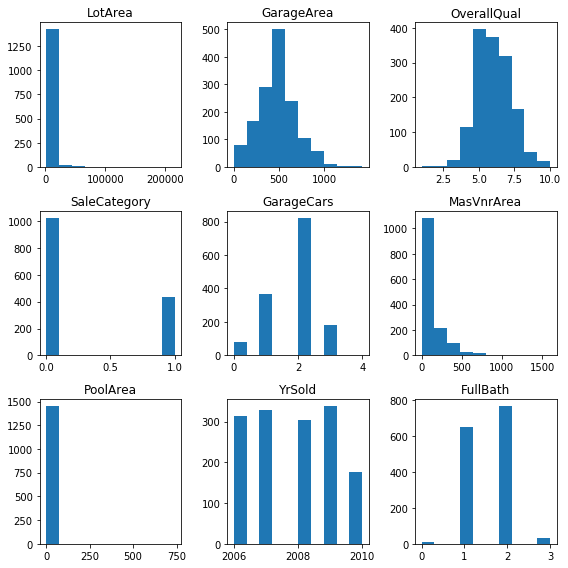

<Figure size 360x360 with 0 Axes>

In [415]:
# посмотрим на корреляции между отдельными каегориями
fig, axes = plt.subplots(3,3,figsize=(8,8))
for col, ax in zip(['LotArea','GarageArea','OverallQual','SaleCategory','GarageCars','MasVnrArea','PoolArea','YrSold','FullBath'],axes.flat):
    ax.hist(df_train[col])
    ax.set_title(col)
plt.tight_layout()
plt.figure(figsize=(5,5));

In [ ]:
# OverallQual (качество жилья) - среднее, YrSold (год продажи) - между 2006 и 2010

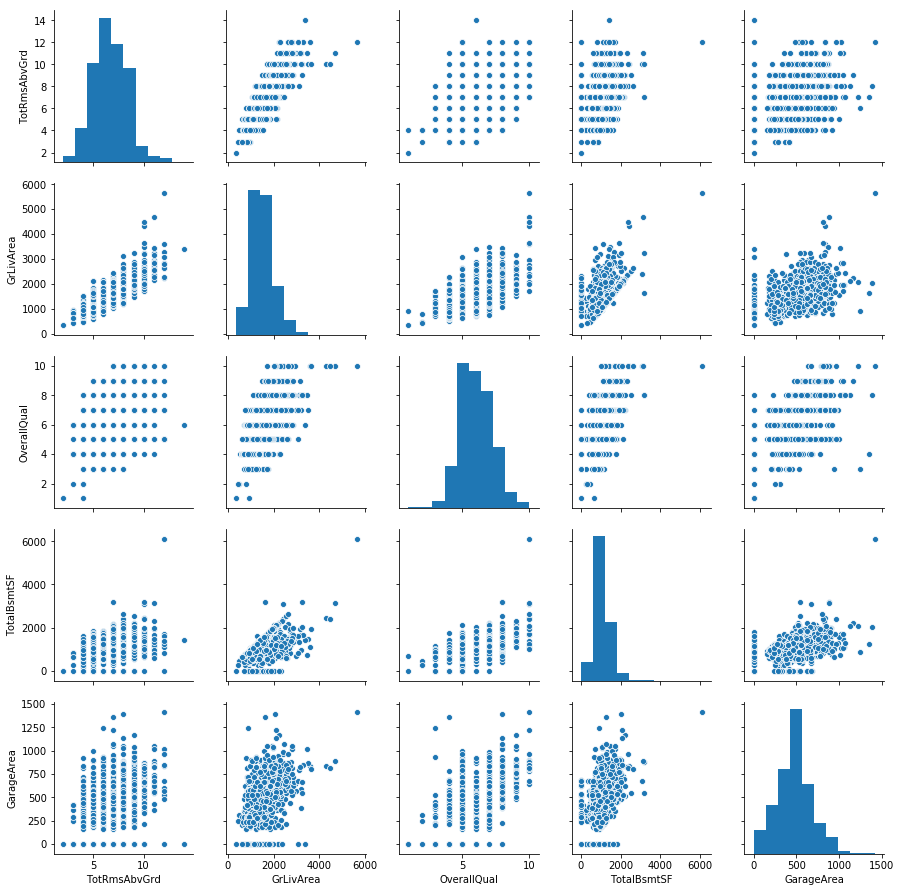

In [416]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df_train[['TotRmsAbvGrd','GrLivArea',
                   'OverallQual', 
                'TotalBsmtSF','GarageArea']]);

In [ ]:
# есть сильные корреляции

In [417]:
def get_one_hot(df, cols): 
    """
    Функция берет обычный pd Data Frame, его колонки, которые надо заэнкодить
    как правило это названия колонок с категориальными данными.
    Возвращает датафрейм, в котором все колонки заэнкожены
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False) # подаем датафрейм (df[each]) и говорим, что к каждой категории добавится еще название исходной переменной (prefix=each)
        df = pd.concat([df, dummies], axis=1)#                              drop_first=False - не выкидывать первую исходную колонку
    return df

In [427]:
# получаем датафрейм с колонками, которые мы получили с помощью функции get_one_hot
one_hot_df = get_one_hot(df_train, to_encode)
one_hot_df.head()

,BsmtExposure,PoolArea,TotalBsmtSF,YearRemodAdd,EnclosedPorch,RoofMatl,BsmtFinSF1,ExterCond,BsmtFinSF2,GarageArea,...,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,No,0,856,2003,0,CompShg,706,TA,0,548,...,0,0,0,1,0,0,0,0,0,1
1,Gd,0,1262,1976,0,CompShg,978,TA,0,460,...,0,0,0,1,0,0,0,0,0,1
2,Mn,0,920,2002,0,CompShg,486,TA,0,608,...,0,0,0,1,0,0,0,0,0,1
3,No,0,756,1970,272,CompShg,216,TA,0,642,...,0,1,0,0,0,0,0,0,0,1
4,Av,0,1145,2000,0,CompShg,655,TA,0,836,...,0,0,0,1,0,0,0,0,0,1


In [428]:
one_hot_df.shape

(1459, 315)

In [429]:
# проверим, почему столбцов стало 315
new_metrics = 0
for encode in to_encode:
    new_metrics += (len(df_train[encode].unique()))
new_metrics

239

In [430]:
# в сумме как раз полученные столбцы и те, которые были сначала, дают:
new_metrics + df_train.shape[1]

315

In [431]:
# запишем в список только новые полученные колонки (278 шт)
cols = list(set(one_hot_df.columns.tolist()) - set(to_encode))

In [432]:
one_hot_df[cols].shape

(1459, 278)

In [433]:
one_hot_df = one_hot_df[cols]

6. Провести сокращение размерности датасета с использованием метода PCA

In [474]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [475]:
y = one_hot_df['SaleCategory'].copy()
x = one_hot_df.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

In [476]:
scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

Попробуем вначале визуализировать данные при помощи только двух компонент, чтобы примерно понимать характер взаимосвязи переменных (линейный/нелинейный)

In [477]:
pca = PCA(n_components=2)

In [478]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [479]:
X_pca = pca.transform(x_train_scaled)

Text(0,0.5,'Вторая главная компонента')

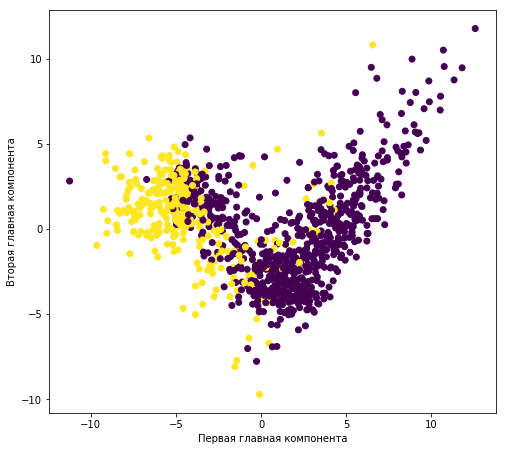

In [480]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train)
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

In [481]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.070
n-components=2, explained variance 0.102


In [482]:
pca = PCA(n_components=200)

In [483]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [484]:
X_pca = pca.transform(x_train_scaled)

In [485]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.070
n-components=2, explained variance 0.102
n-components=3, explained variance 0.130
n-components=4, explained variance 0.154
n-components=5, explained variance 0.176
n-components=6, explained variance 0.195
n-components=7, explained variance 0.212
n-components=8, explained variance 0.229
n-components=9, explained variance 0.242
n-components=10, explained variance 0.256
n-components=11, explained variance 0.269
n-components=12, explained variance 0.282
n-components=13, explained variance 0.293
n-components=14, explained variance 0.304
n-components=15, explained variance 0.315
n-components=16, explained variance 0.326
n-components=17, explained variance 0.336
n-components=18, explained variance 0.346
n-components=19, explained variance 0.355
n-components=20, explained variance 0.365
n-components=21, explained variance 0.374
n-components=22, explained variance 0.383
n-components=23, explained variance 0.392
n-components=24, explained variance 0.401
n

Text(0,0.5,'explained_variance_ratio_')

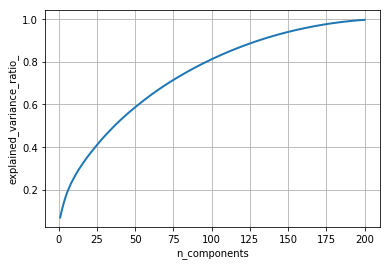

In [486]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [487]:
# 150 главных компонент объясняют больше 90% дисперсии

In [488]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([6.99478367, 3.22192024, 2.74537173, 2.46356375, 2.2230254 ,
       1.89640467, 1.67403715, 1.6536554 , 1.36280246, 1.35381958,
       1.30967053, 1.25138706, 1.18107574, 1.09694022, 1.07912249,
       1.0481273 , 1.02740462, 0.97396706, 0.96352581, 0.95046848,
       0.91994924, 0.90468646, 0.89266082, 0.87812891, 0.8687813 ,
       0.85584223, 0.84385348, 0.82761383, 0.80804284, 0.79274254,
       0.77524312, 0.76240193, 0.75693109, 0.74006914, 0.73935975,
       0.73051256, 0.71576296, 0.70915215, 0.68965711, 0.67521888,
       0.66720664, 0.657731  , 0.64547316, 0.64369674, 0.62332697,
       0.61857348, 0.61370657, 0.6053086 , 0.59266547, 0.58856214,
       0.58200344, 0.57890823, 0.57503651, 0.56814156, 0.56126424,
       0.55243893, 0.54527747, 0.54162159, 0.53651707, 0.53292837,
       0.52924268, 0.52335702, 0.50857049, 0.50613289, 0.49374251,
       0.4914595 , 0.48867848, 0.47744749, 0.47347575, 0.47050943,
       0.46133331, 0.4509506 , 0.4505988 , 0.44845613, 0.44268

In [490]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Text(0,0.5,'explained_variance_ratio_')

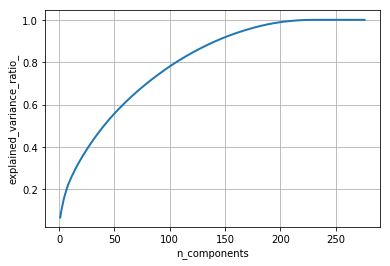

In [491]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaler.fit_transform(df_train))
# pca = PCA().fit(df_train)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [492]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

X = df_train
y = df_train_y
clf = RandomForestClassifier(n_estimators=100, max_depth=3) # use any model

scores = cross_validate(
    clf, X, y, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)

In [493]:
scores

{'fit_time': array([0.24654245, 0.1457119 , 0.17367697, 0.1487236 , 0.15121961]),
 'score_time': array([0.03543377, 0.03495264, 0.05290222, 0.0504086 , 0.03892946]),
 'test_roc_auc': array([0.96882534, 0.96731147, 0.97482478, 0.94673395, 0.95379761]),
 'train_roc_auc': array([0.96986794, 0.97133805, 0.96693122, 0.97350989, 0.97389964]),
 'test_accuracy': array([0.89726027, 0.88013699, 0.91780822, 0.89383562, 0.89347079]),
 'train_accuracy': array([0.9108826 , 0.90745501, 0.90145673, 0.9134533 , 0.91267123]),
 'test_f1': array([0.80263158, 0.76821192, 0.85185185, 0.80254777, 0.80745342]),
 'train_f1': array([0.83279743, 0.82524272, 0.81946625, 0.83942766, 0.8370607 ]),
 'test_precision': array([0.93846154, 0.90625   , 0.92      , 0.9       , 0.87837838]),
 'train_precision': array([0.94525547, 0.94444444, 0.90311419, 0.93950178, 0.94244604])}